In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
df=pd.read_csv("C:\\Users\\Adhil E\\Downloads\\Dataset_II.csv")

In [29]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [31]:
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode()[0])

In [32]:
df=df.drop(columns=['Unnamed: 0'])

In [36]:
df=pd.get_dummies(data=df,columns=['Sex','Housing','Saving accounts','Checking account','Purpose'],drop_first=True)

In [37]:
df

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,35,1,9055,36,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,53,2,2835,24,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
7,35,3,6948,36,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
8,61,1,3059,12,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
9,28,3,5234,30,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [38]:
from sklearn.cluster import KMeans


In [45]:
distortions=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

In [46]:
x=np.arange(1,10)

Text(0.5,1,'K vs Inertia')

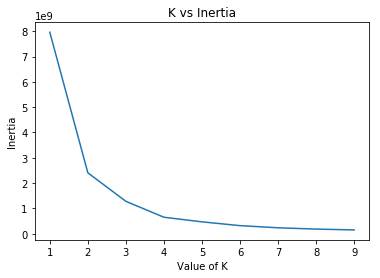

In [50]:
plt.plot(x,distortions)
plt.xlabel("Value of K")
plt.ylabel("Inertia")
plt.title("K vs Inertia")

In [49]:
#SO OPTIMUM K IS 2

In [55]:
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(df)
ypred=Kmeans.fit_predict(df)

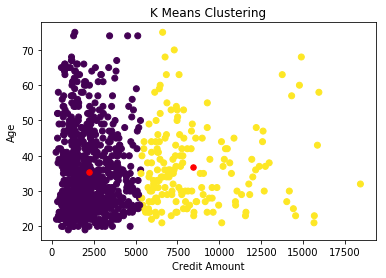

In [61]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df.iloc[:,2], df.iloc[:,0],c=ypred)
plt.xlabel("Credit Amount")
plt.ylabel("Age")
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s=30, c='red',label='centre')
plt.title("K Means Clustering")
plt.show()